<a href="https://colab.research.google.com/github/AtK42/NewTech_FS23/blob/main/lecture_2_fs2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Universal Approximation - a dynamic point of view

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')
#%cd /content/drive/My Drive/Colab Notebooks/
#%ls

In [ ]:
#%tensorflow_version 1.x

# Controlled Ordinary Differential Equations

We shall in the sequel take an unusual (but familiar to many researchers) point of view towards deep neural networks. Consider a controlled ordinary differential equation (ODE), i.e.
$$
(\ast) \qquad dX_t = \sum_{i=1}^d V_i(X_{t-}) du^i(t), \; X_0 = x
$$
where $ V_i $ are some smooth vector fields on $ \mathbb{R}^m $ with all proper derivatives bounded. $ u $ is a finite variation curve with values in $ \mathbb{R}^d $. For simplicity we shall always consider finitely many jumps of $ u $ in this lecture, and $ u $ being $ C^\infty$ between two jumps.

A solution of this equation is given by a fixed point of
$$
X_t = x + \sum_{i=1}^d \int_0^t V_i(X_{s-}) du^i(s)
$$
for $ t \geq 0 $. Notice that the integral is well defined due to the finite variation property.
***
note that this is a fixed point problem since X appears on both sides of the equality

if the u is piecewise constant (i.e., equal to zero up to 1 and there jumps to one, then
$ dX_t = V_t(X_{t-}) \ du(t) ⟺ X_t = x + \int_0^t V(x_{̃\tilde t -}) \ du(\tilde t)$ and

$X_t = x$ for t < 1

$X_1 = x + v(x) \cdot \Delta \mu(1) = x + V(x)$

$X_t = x + v(x)$, for t > 1, since after one du = 0 again
***

We shall analyze two aspects in the sequel:
1. Connection to deep neural networks.
2. How expressive are those networks.

For the first aspect consider vector fields of the form
$$
V(x) = \sum_{j=1}^N \alpha_j \phi(\langle \mu_j , x \rangle + \beta_j)
$$
for some vectors $ \alpha_j, \mu_j \in \mathbb{R}^m $ and numbers $ \beta_j $. Notice that we could also take vector fields of the form
$$
V(x) = W {\phi}(x) + a - x
$$
for matrices $ W $ and vectors $ a $ to achive the same result.

In this case the Euler scheme, which approximates the solution of the ODE, is an iterative procedure where maps of the type
$$
x \mapsto x + \sum_{i=1}^d V_i(x) \Delta u^i(t)
$$
at point $ x \in \mathbb{R}^N $ and $ t \geq 0 $ are concatenated. Obviously one can understand such finite concatenations as deep neural networks with at most $ m + N $ neurons in each layers and depths being equal to the time discretization with respect to the ODE's initial value.

><font color=red>We therefore call the map $ x \mapsto X_t $ a deep neural network of infinite depths. Notice that for piecewise constant $ u $ we just obtain classical neural networks of finite depths.</font>

Notice that one could also consider the Picard-Lindelof iteration scheme to obtain neural networks, then depth would be related to the iteration step.

This obvious point of view has been taken in several papers, most recently in [Neural ordinary differential equations](https://arxiv.org/pdf/1806.07366.pdf). There are three new aspects in our approach: first the control approach, i.e. the use of additional control variables $u^i$, second, that actually every feedforward neural network is this very form, and, third, the obvious question how the choice of the vector fields influences the expressibility of the networks.

For the third aspect consider a training data set $ {(x_l,y_l)}_{l \in L} $, i.e. a subset of a graph of an $ \mathbb{R}^m$-valued continuous function on some compact set. The cardinality of $L$ should be seen as large but finite.

Consider the following ODE on $ \mathbb{R}^{mL} $
$$
dZ_t = \sum_{i=1}^d W_i(Z_{t-}) du^i(t) \, ,
$$
where
$$
(W_i((x_l)))_l:=V_i(x_l)
$$
for $ l \in L $ and $ i = 1,\ldots,d $. We actually make a _particle system_ of $ L $ particles moving precisely according to the dynamics of $ (\ast) $. This system also has a unique solution for all times just as equation $(\ast)$.

Representability of the non-linear function on the training set amounts precisely to saying that, for given $ t > 0 $, the particle system $ Z $ can possibly reach at $ t $ any point $ (y_l) $ if starting at $ (x_l) $ for some choice of control $u$.

For such questions the notion of controllability has been introduced, in particular [Chow's theorem](https://en.wikipedia.org/wiki/Chow%E2%80%93Rashevskii_theorem):

<b>
If the Lie brackets of $ (W_i) $ generate at the point $ (x_l) $ the whole space $ \mathbb{R}^{mL} $, then any point $ (y_l) $ can be reached locally. Such systems are called exactly controllable.
</b>

There are many different notions of controllability but all are related to Lie brackets on the one hand ('geometric condition' or H&ouml;rmander condition) and certain analytic assumptions on the vector fields on the other hand.

Can we reach with our particular vector fields the geometric condition? We consider some illustrative examples of course for $ d \geq 2 $.

1. Take a one point training set and choose $ V_i(x) = A_i x $ to be linear vector fields, e.g. with respect to a standard normal distribution on the matrix elements. Then the geometric condition (H&ouml;rmander condition) is satisfied at any point $ x \neq 0 $ with probability $1$.
2. Take a one point traning set and choose $V_i $ one layer neural networks with randomly choosen directions $ \mu_j $ and activation functions with non-vanishing derivative at all points, then the geometric condition is satisfied.
3. Take a general $ \operatorname{card}(L) $ point training set and consider $ d = m \times \operatorname{card} $ control directions and vector fields. Assume that for every point $ x_l $ in the training set there are $m$ linearly independent vector fields. Then the geometric condition is satisfied.
4. We consider this question also in an infinite dimensional situation, for instance on the torus: for every $ m \geq 1 $ for \emph{every} $ d \geq 2 $ there are vector fields $ V_i $ on the torus such that the transport operators
$$
V_i f(x) = d f(x) \cdot V(x)
$$
on $L^2(\mathbb{T}^m)$ generate with their Lie brackets a dense subspace at any non-constant Fourier polynomial $ f \in L^2(\mathbb{T}^m) $. 

Having this theoretical result at hand we know that there are actually 'generic' choices of vector fields (often realized by random choices) which at least locally allow for controllability.

The actual interpretation (which is another universal approximation theorem) is the following: a generic choice of vector fields $ V_i $ of the above controlled system can be realized by random neural networks and a certain number of controls $ u^1,\ldots,u^d$ leads to an infinite depth neural network with $ m + N $ nodes on each layer which can approximate any continuous function on a compact set.

This might help to explain the following curious phenomenon (we remember the standard MNIST classification from last week's lecture 1):

In [ ]:
import numpy as np
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


1


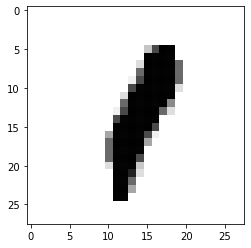

In [ ]:
import matplotlib.pyplot as plt
#matplotlib inline # Only use this if using iPython
image_index = np.random.randint(60000) #7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is printed
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

In [ ]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])
y_train.shape

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


(60000,)

In [ ]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
layer1=Conv2D(28, kernel_size=(3,3), input_shape=input_shape)
layer1.trainable=True
model.add(layer1) # (3,3) for mnist
model.add(MaxPooling2D(pool_size=(2, 2))) # (2,2) for mnist
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
layer2 = Dense(128, activation=tf.nn.relu,kernel_initializer='random_uniform')#glorot_uniform is by default
layer2.trainable=True#False
model.add(layer2)
#layer3 = Dense(2*128, activation=tf.nn.relu,kernel_initializer='random_uniform')
#layer3.trainable=False
#model.add(layer3)
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [ ]:
4732*128+128

605824

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
for i in range(1):
    model.fit(x=x_train,y=y_train, epochs=1)
    x = model.evaluate(x_test, y_test)
    print('\n',x)

313/313 [==============================] - 2s 6ms/step - loss: 0.0996 - accuracy: 0.9684

 [0.09956008195877075, 0.9684000015258789]


In [ ]:
import numpy as np
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D, Concatenate, Dropout, \
                        Flatten, MaxPooling2D, Multiply, Lambda, Add
from keras.backend import constant
from keras import optimizers

#from keras.engine.topology import Layer
from keras.models import Model
from keras.layers import Input
from keras import initializers
from keras.constraints import max_norm
import keras.backend as K

m = 20*20 # dimension of state space (number of hidden nodes in each layer)
d = 2 # number of controls
N = 40 # length of the sequence of increments
state = Input(shape=input_shape)
inputs = [state]
state = Conv2D(28, kernel_size=(3,3),trainable=False)(state)
state = Flatten()(state)
state = Dense(m, activation='tanh',trainable=False,
              kernel_initializer=initializers.RandomNormal(0,1),#kernel_initializer='random_normal',
              bias_initializer='random_normal')(state)
output_state = []
layers = []
for j in range(N):
    for i in range(d):
        layer = Dense(m, activation='tanh',trainable=False,
                      kernel_initializer=initializers.RandomNormal(0,1),#kernel_initializer='random_normal',
                      bias_initializer='random_normal',
                      name=str(i)+str(j))
        layers = layers + [layer]

for j in range(N):
    for i in range(d):
        #layer=Dense(m, activation='tanh',trainable=False,
        #            kernel_initializer=initializers.RandomNormal(0,1),#kernel_initializer='random_normal',
        #            bias_initializer='random_normal',
        #            name=str(i)+str(j))
        Vx = layers[i+(j)*d](state)
        #Vx  = Dense(m, activation='tanh',trainable=False,
        #            kernel_initializer=initializers.RandomNormal(0,1),#kernel_initializer='random_normal',
        #            bias_initializer='random_normal')(state) # generation of the vector field
        #Vx  = Dense(m, activation='tanh',trainable=False,
        #            kernel_initializer='random_normal',
        #            bias_initializer='random_normal')(Vxhelper)
        input_control_incr = Input(shape=(1,))
        helper = Dense(1, activation='linear',trainable=True,
                       kernel_initializer=initializers.RandomNormal(1,0.),
                       bias_constraint=max_norm(0.),name='u'+str(i)+str(j))(input_control_incr)
        helperlist = [helper for i in range(m)]
        delta_u = Concatenate()(helperlist) # increments vectorized       
        mult = Multiply()([Vx, delta_u])
        state = Add()([mult,state])
        inputs = inputs + [input_control_incr]
    output_state=output_state+[state]
state = output_state[-1]
state = Dense(10, activation=tf.nn.softmax,trainable=True,
              kernel_initializer='random_uniform',
              bias_initializer='zeros')(state)
model = Model(inputs, outputs=state)

#model = Sequential()
#layer1=Dense(128,activation=tf.nn.relu, input_shape=input_shape)#128
#layer1.trainable=False
#model.add(layer1)
#layer2=Dense(128,activation=tf.nn.relu)#32
#layer2.trainable=False
#model.add(layer2)
#for i in range(3):
#    layer3=Dense(128,activation=tf.nn.relu,kernel_initializer=initializers.random_normal(0,0.1))   
#    layer3.trainable=False
#    model.add(layer3)
#model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
#model.add(Dense(10,activation=tf.nn.softmax))

In [ ]:
#model.summary()

In [ ]:
x_train_new = [x_train] + [1/N*np.ones((60000,1)) for i in range(N*d)]
x_test_new = [x_test] + [1/N*np.ones((10000,1)) for i in range(N*d)]
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
for i in range(1):
    model.fit(x=x_train_new,y=y_train, epochs=1)
    x = model.evaluate(x_test_new, y_test)
    print('\n',x)
    
#model.compile(optimizer='adam', 
#              loss='sparse_categorical_crossentropy', 
#              metrics=['accuracy'])
#for i in range(1):
#    model.fit(x=x_train,y=y_train, epochs=1)
#    x = model.evaluate(x_test_new, y_test)
#    print('\n',x)

313/313 [==============================] - 25s 67ms/step - loss: 0.2917 - accuracy: 0.9110

 [0.2917337417602539, 0.9110000133514404]


We realize: if we replace the well specified architecture by a random one also obtain reasonable training results (even though speed deteriorates). Of course this is an extremely generic implementation, however, it shows the effect.

1/1 [==============================] - 0s 99ms/step


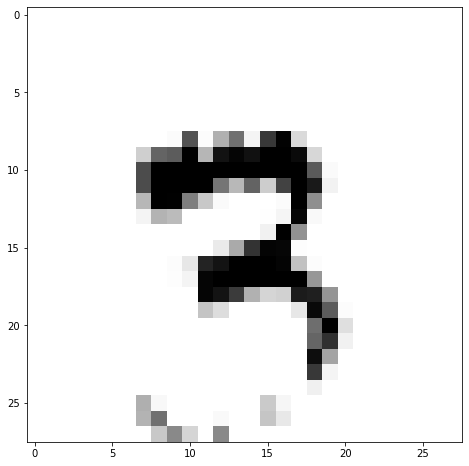

Prediction 7
Ground Truth 3
1/1 [==============================] - 0s 253ms/step


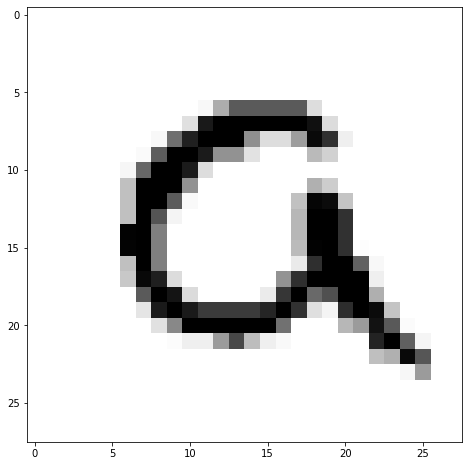

Prediction 7
Ground Truth 9
1/1 [==============================] - 0s 94ms/step


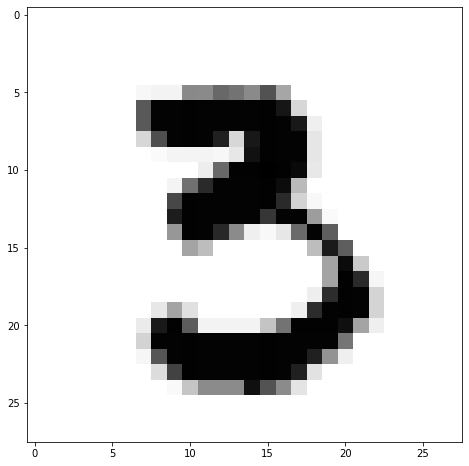

Prediction 5
Ground Truth 3
1/1 [==============================] - 0s 94ms/step


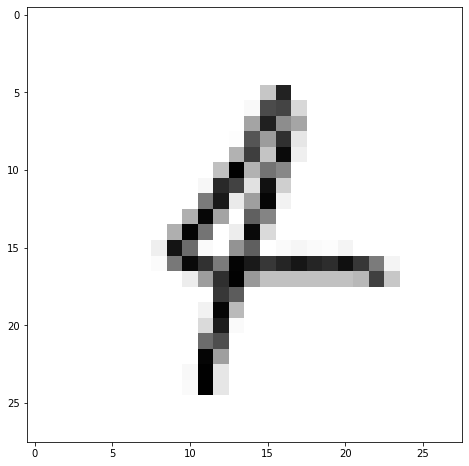

Prediction 2
Ground Truth 4
1/1 [==============================] - 0s 95ms/step


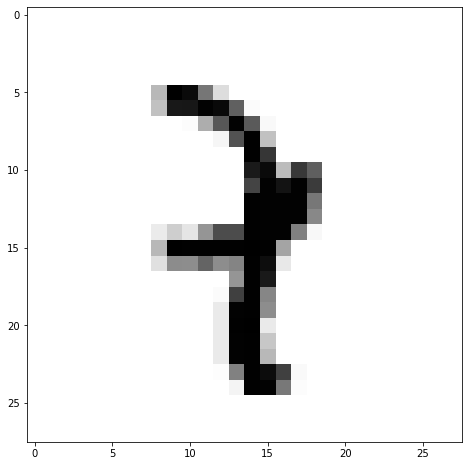

Prediction 1
Ground Truth 7
1/1 [==============================] - 0s 92ms/step


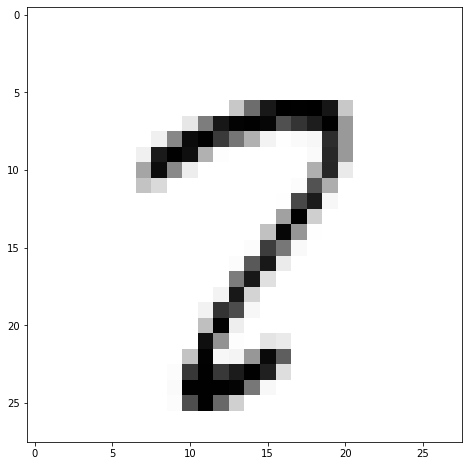

Prediction 7
Ground Truth 2
1/1 [==============================] - 0s 100ms/step


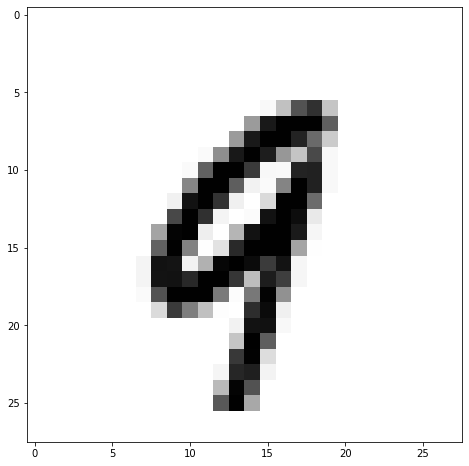

Prediction 4
Ground Truth 9
1/1 [==============================] - 0s 93ms/step


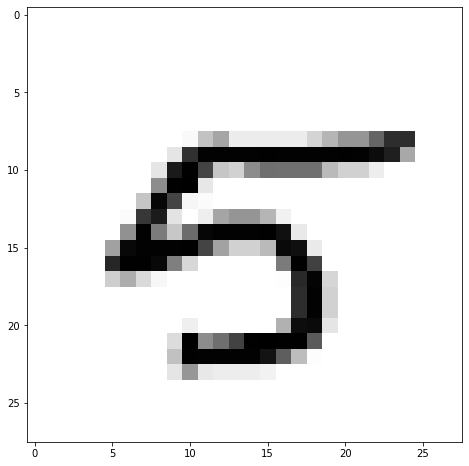

Prediction 4
Ground Truth 5
1/1 [==============================] - 0s 95ms/step


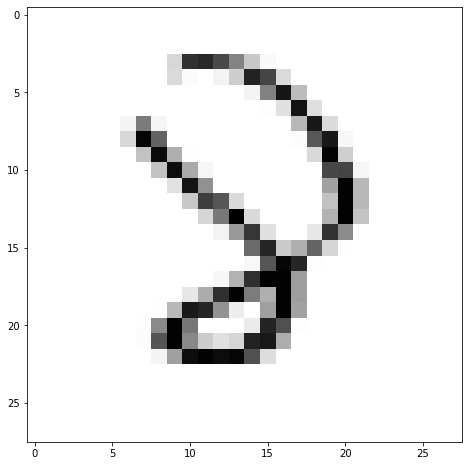

Prediction 2
Ground Truth 8
0.09


In [ ]:
img_rows=28
img_cols=28
count = 0
for i in range(100):
    image_index = np.random.randint(10000)
    #pred = model.predict([x_test[image_index]]+[1/N*np.ones((60000,1)) for i in range(N*d)])
    pred = model.predict([x_test[image_index].reshape(1, img_rows, img_cols, 1)]+[1/N*np.ones((1,1)) for i in range(N*d)])
    if pred.argmax() != y_test[image_index]:
        plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
        plt.show()
        print('Prediction',pred.argmax())
        print('Ground Truth',y_test[image_index])
        count = count + 1
        #break
print(count/100)

In order to understand actual training we shall derive the first variation with respect to parameters $ \theta $, i.e. we take the derivative with respect to the parameter $ \theta $, denoted by $ \partial X_T $ of
$$
dX^\theta_t = \sum_{i=1}^d V^\theta_i(t-,X^\theta_{t-}) du^i(t), \; X_0 = x \; .
$$
Notice that we write for convenience an additional time dependence in the vector fields since this is actually an important case. This leads to
$$
d \partial X^\theta_t = \sum_{i=1}^d \big( \partial V^\theta_i(t-, X^\theta_{t-}) + dV^\theta_i(t-, X^\theta_{t-}) \partial X^\theta_{t-} \big) du^i(t), \; \partial X^\theta_0 = 0 \, ,
$$
which can be solved by first solving the equation for $ X^\theta $ in a forward manner, i.e.
$$
X^\theta_t = x + \sum_{i=1}^d \int_0^t V^\theta_i(s-,X^\theta_{s-}) du^i(s) \,
$$
for $ t \geq 0 $, and observing that the solution of the first variation equation is actually
given by an evolution operator $ J_{s,t} $ which satisfies with respect to $t$
$$
d J_{s,t} =  \sum_{i=1}^d dV^\theta_i(t-,X^\theta_{t-}) J_{s,t-} du^i(t), \; J_{s+,s}=J_{s,s-}  = \operatorname{id} \, ,
$$
and the variation of constants formula
$$
\partial X^\theta_t = \sum_{i=1}^d \int_0^t J_{s+,t} \partial V^\theta_i(s-,X^\theta_{s-}) du^i(s) \, .
$$
The proof is actually an application of Fubini's theorem, since
$$
J_{s+,t} = \operatorname{id}+ \sum_{j=1}^d \int_{s+}^t dV^\theta_j(r-,X^\theta_{r-}) J_{s+,r-} du^j(r) \, ,
$$
and therefore
$$
\partial X^\theta_t = \sum_{i,j=1}^d \int_0^t  \int_{s+}^t dV^\theta_j(r-,X^\theta_{r-}) J_{s+,r-} du^j(r)\partial V^\theta_i(s-,X^\theta_{s-}) du^i(s) + \sum_{i=1}^d \int_0^t \partial V^\theta_i(s-,X^\theta_{s-}) du^i(s)\, .
$$
By Fubini's theorem this leads to
$$
\partial X^\theta_t = \sum_{i,j=1}^d \int_0^t  dV^\theta_j(r-,X^\theta_{r-}) \int_{0}^{r-}  J_{s+,r-} \partial V^\theta_i(s-,X^\theta_{s-}) d u^j(s) du^i(r) + \sum_{i=1}^d \int_0^t \partial V^\theta_i(s-,X^\theta_{s-}) du^i(s) \, ,
$$
which is the desired equation.

These remarkable formulas can be interpreted in the following way: calculate first $ J_{s,T} $ which is calculated backwards in time along the solution trajectory of the forward process $ X^\theta $ on $[0,t]$. Then integrate the derivatives of $ \partial V^\theta $ transformed by $ J_{s+,T} $ to obtain the derivative of $ \partial X_T^\theta $
$$
\partial X^\theta_T = \sum_{i=1}^d \int_0^T J_{s+,T} \partial V^\theta_i(s-,X^\theta_{s-}) du^i(s) \, .
$$
If instead one is interested in the gradient of a loss function $ L(X^\theta_T) $, by $ \partial L(X^\theta_T) = \nabla L(X_T^\theta) \partial X^\theta_T $ the problem is solved, too.

In our approach we do also consider the controls $ u^i $ as variables which can be optimized, hence also the gradients with respect to $ u^i $ are of importance: we calculate the derivative of $ u^i + \epsilon a^i $ for $ \epsilon = 0 $ and obtain
$$
d \partial_\epsilon X_T^\epsilon = \sum_{i=1}^d V^\epsilon_i(t-, X^\epsilon_{t-}) da^i(t)  + dV^\epsilon_i(t-, X^\epsilon_{t-}) \partial_\epsilon X^\epsilon_{t-} du^i(t), \; \partial_\epsilon X^\epsilon_0 = 0 \, ,
$$
hence a completely analogue situation appears, i.e.
$$
\partial_\epsilon X_T^\epsilon = \sum_{i=1}^d \int_0^t J_{s+,T} V^\epsilon_i(s-, X^\epsilon_{s-}) da^i(s)
$$
by variation of constants.

>Notice that the surjectivity of the map $ a \mapsto \partial_\epsilon X^\theta_T $ leads precisely to a H&ouml;rmander condition for the vector fields $ V_i $.

Let us sum up the previous considerations:
1. We can understand deep neural networks as flows of controlled ordinary differential equations.
2. Backpropagation appears as the classical forward-backward calculation of first variations.
3. Variations with respect to the control can also be calculated in a forward-backward manner.
4. Since gradients can be efficiently calculated we can set up search algorithms stochastic gradient descent, simulated annealing, etc.

Let us consider this for one layer of a neural network:
$$
L^{(i)}: x \mapsto W^{(i)}x + a^{(0)} \mapsto \phi (W^{(i)}x + a^{(0)})
$$
Translating this to a controlled ODE needs the following ingredients:
1. a cadlag control $u(t)=1_{[1,2[}(t)+2 \, 1_{[2,\infty[}(t)$, i.e. we have two jumps by $1$ at $ t = 1 $ and $ t =2 $ of size $1$, and
2. a time-dependent vector field
$$
V(t,x) = 1_{[0,1]}(t)(L^{(0)}(x)-x)+ 1_{]1,\infty]}(t)(L^{(1)}(x) -x ) \, .
$$

The corresponding neural network at 'time' $ 3 $ is just
$$
x \mapsto L^{(0)}(x) \mapsto \phi(W^{(1)}L^{(0)}(x) + a^{(1)}) \,
$$
which is a one hidden layer neural network with $\phi$ readout.

The parameters $ \theta $ are the matrix weights $ W^{(i)} $ and shifts $ a^{(i)} $.

The backwards first variation can be constructed by looking at the derivatives of $ V(t,.) $ with respect to $ x $ and solving the corresponding equation backwards: at 'time' $T=3$ we have
$$
J_{s,3} v =v + 1_{[0,1[}(s)(dL^{(1)}(X_{s-})d L^{(0)}(x)v-v) +1_{[1,2[}(s)(d L^{(1)}(X_{s-})v-v) 
$$
which is nothing than encoding the outer part of the chain rule.

Calculating now the derivative of the network with respect to, e.g., $ a^{(1)} $ amounts then just to calculting the variation of constants integral which gives the correct partial derivatives.

Let us look at this phenomenon in an example following [Deep Learning with Keras and Tensorflow](https://github.com/leriomaggio). We consider a one hidden layer neural network as above with loss function $ 0.5*(y-\hat{y})^2 $ whose gradient is easily calculated in terms of the scalar product of the error with the respective gradient of $ X^\theta $ with respect to the network parameters.

What is implemented in the sequel is a simple gradient descent (with momentum): let us denote the loss function by $ L(\theta) $, then
$$
\theta^{(n+1)} = \theta^{(n)} -  N \, \nabla L(\theta^{(n)}) - M \, \nabla L(\theta^{(n-1)}) \, .
$$

In [ ]:
# Import the required packages
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy

print(pd.__version__)

# Display plots in notebook 
%matplotlib inline
# Define plot's default figure size
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

import random
random.seed(123)

# calculate a random number where:  a <= rand < b
def rand(a, b):
    return (b-a)*random.random() + a

1.3.5


In [ ]:
#read the datasets
train = pd.read_csv("intro_to_ann.csv")

X, y = np.array(train.iloc[:,0:2]), np.array(train.iloc[:,2])

print(X.shape)
print(y.shape)
print(y)

(500, 2)
(500,)
[1 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1
 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1
 1 0 0 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 1 1
 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 0
 0 1 1 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0
 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1
 1 1 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0
 1 0 1 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 1 0 0 1 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0
 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0
 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1
 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1
 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1 1 0
 0 1 1 1 

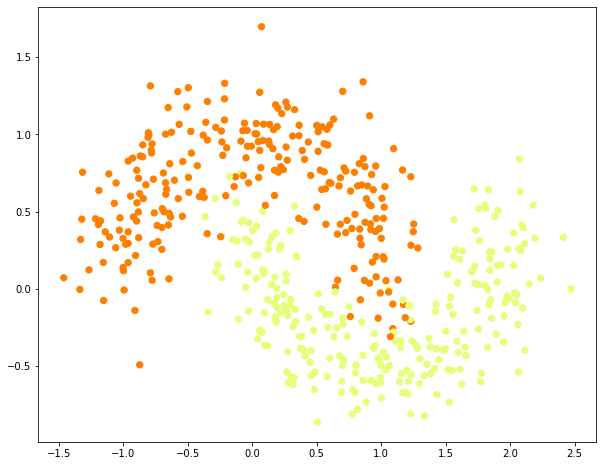

In [ ]:
#Let's plot the dataset and see how it is
plt.scatter(X[:,0], X[:,1], s=40, c=1-y[:], cmap=plt.cm.Wistia)

In [ ]:
# Make a matrix 
def makeMatrix(I, J, fill=0.0):
    return np.zeros([I,J])

In [ ]:
# our sigmoid function
def sigmoid(x):
    #return math.tanh(x)
    return 1/(1+np.exp(-x))

In [ ]:
# derivative of our sigmoid function, in terms of the output (i.e. y)
def dsigmoid(y):
    return y - y**2

In [ ]:
# the multilayerperceptron class (with one hidden layer)

class MLP:
    def __init__(self, ni, nh, no):
        # number of input, hidden, and output nodes
        self.ni = ni + 1 # +1 for bias node
        self.nh = nh
        self.no = no

        # activations for nodes -- these are list of respective length
        self.ai = [1.0]*self.ni
        self.ah = [1.0]*self.nh
        self.ao = [1.0]*self.no
        
        # create weights
        self.wi = makeMatrix(self.ni, self.nh)
        self.wo = makeMatrix(self.nh, self.no)
        
        # set them to random vaules
        for i in range(self.ni):
            for j in range(self.nh):
                self.wi[i][j] = rand(-0.2, 0.2)
        for j in range(self.nh):
            for k in range(self.no):
                self.wo[j][k] = rand(-2.0, 2.0)

        # last change in weights for momentum   
        self.ci = makeMatrix(self.ni, self.nh)
        self.co = makeMatrix(self.nh, self.no)
        

    def backPropagate(self, targets, N, M):
        
        if len(targets) != self.no:
            print(targets)
            raise ValueError('wrong number of target values')

        # calculate error terms for output
        output_deltas = np.zeros(self.no)
        for k in range(self.no):
            error = targets[k]-self.ao[k] 
            output_deltas[k] = dsigmoid(self.ao[k]) * error

        # calculate error terms for hidden
        hidden_deltas = np.zeros(self.nh)
        for j in range(self.nh):
            error = 0.0
            for k in range(self.no):
                error += output_deltas[k]*self.wo[j][k]
            hidden_deltas[j] = dsigmoid(self.ah[j]) * error

        # update output weights
        for j in range(self.nh):
            for k in range(self.no):
                change = output_deltas[k] * self.ah[j]
                self.wo[j][k] += N*change + M*self.co[j][k] # N is the learning rate, M the momentum
                self.co[j][k] = change

        # update input weights
        for i in range(self.ni):
            for j in range(self.nh):
                change = hidden_deltas[j]*self.ai[i]
                self.wi[i][j] += N*change + M*self.ci[i][j]
                self.ci[i][j] = change

        # calculate error
        error = 0.0
        for k in range(len(targets)):
            error += 0.5*(targets[k]-self.ao[k])**2
        return error


    def test(self, patterns):
        self.predict = np.empty([len(patterns), self.no])
        for i, p in enumerate(patterns):
            self.predict[i] = self.activate(p)
            #self.predict[i] = self.activate(p[0])
            
    def activate(self, inputs): # here the network is constructed as a function
        
        if len(inputs) != self.ni-1:
            print(inputs)
            raise ValueError('wrong number of inputs')

        # input activations
        for i in range(self.ni-1):
            self.ai[i] = inputs[i]

        # hidden activations
        for j in range(self.nh):
            sum_h = 0.0
            for i in range(self.ni):
                sum_h += self.ai[i] * self.wi[i][j]
            self.ah[j] = sigmoid(sum_h)

        # output activations
        for k in range(self.no):
            sum_o = 0.0
            for j in range(self.nh):
                sum_o += self.ah[j] * self.wo[j][k]
            self.ao[k] = sigmoid(sum_o)

        return self.ao[:]
    

    def train(self, patterns, iterations=1000, N=0.5, M=0.1):
        # N: learning rate
        # M: momentum factor
        patterns = list(patterns)
        for i in range(iterations):
            error = 0.0
            for p in patterns:
                inputs = p[0]
                targets = p[1]
                self.activate(inputs)
                error += self.backPropagate([targets], N, M)
            if i % 5 == 0:
                print('error in iteration %d : %-.5f' % (i,error))
            print('Final training error: %-.5f' % error)

In [ ]:
# create a network with two inputs, ten hidden, and one output nodes
ann = MLP(2, 10, 1)

%timeit -n 1 -r 1 ann.train(zip(X,y), iterations=1)

error in iteration 0 : 31.50196
Final training error: 31.50196
81.8 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
# Helper function to plot a decision boundary.
# This generates the contour plot to show the decision boundary visually
def plot_decision_boundary(nn_model):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                         np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    nn_model.test(np.c_[xx.ravel(), yy.ravel()])
    Z = nn_model.predict
    Z[Z>=0.5] = 1
    Z[Z<0.5] = 0
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], s=40,  c=y, cmap=plt.cm.BuGn)

Text(0.5, 1.0, 'Model with 1 iteration')

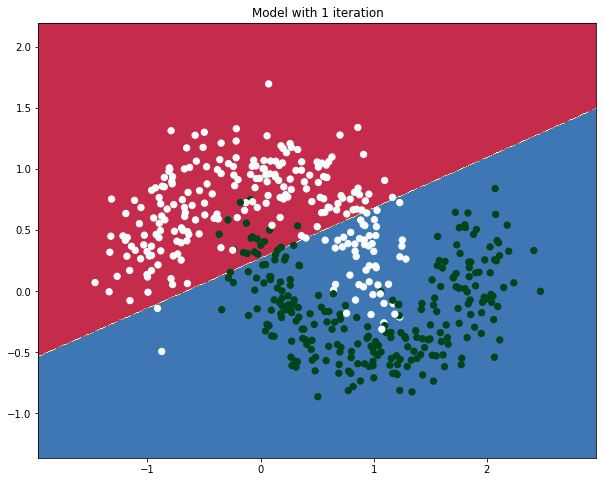

In [ ]:
plot_decision_boundary(ann)
plt.title("Model with 1 iteration")

In [ ]:
# create a network with two inputs, ten hidden, and one output nodes
ann = MLP(2, 10, 1)

%timeit -n 1 -r 1 ann.train(zip(X,y), iterations=100)

error in iteration 0 : 29.18252
Final training error: 29.18252
Final training error: 25.14727
Final training error: 24.99525
Final training error: 24.96553
Final training error: 24.94232
error in iteration 5 : 24.91374
Final training error: 24.91374
Final training error: 24.88046
Final training error: 24.84468
Final training error: 24.80822
Final training error: 24.77233
error in iteration 10 : 24.73777
Final training error: 24.73777
Final training error: 24.70496
Final training error: 24.67407
Final training error: 24.64516
Final training error: 24.61817
error in iteration 15 : 24.59302
Final training error: 24.59302
Final training error: 24.56961
Final training error: 24.54783
Final training error: 24.52756
Final training error: 24.50869
error in iteration 20 : 24.49111
Final training error: 24.49111
Final training error: 24.47472
Final training error: 24.45942
Final training error: 24.44511
Final training error: 24.43169
error in iteration 25 : 24.41908
Final training error: 24.4190

Text(0.5, 1.0, 'Model with 100 iterations')

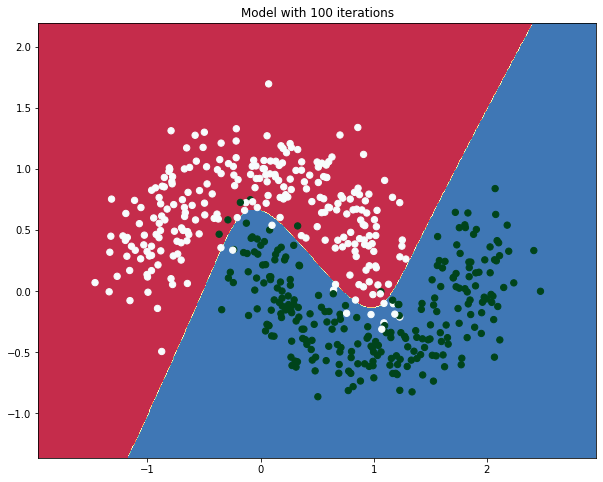

In [ ]:
plot_decision_boundary(ann)
plt.title("Model with 100 iterations")

Several remarks are due here:
1. There are different ways to convert time to depth leading to slightly different ways how to implement backpropagation. It is very efficient to have the 'continuous-time' formulas in mind.
2. It might be also useful to think about controls being themselves trajectories of a stochastic process, for intance a generic semi-martingale.
3. Take controls being $ d $ Brownian motion (with respect to Stratonovich integration) and assume a H&ouml;rmander condition valid for the particle system starting on the training data set, that is the ODE on $ \mathbb{R}^{mL} $ given by
$$
dZ_t = \sum_{i=1}^d W_i(Z_t) \circ dB^i(t) \, ,
$$
where
$$
(W_i((x_l)))_l:=V_i(x_l)
$$
for $ l \in L $ and $ i = 1,\ldots,d $. Then with probability one a (possibly only small) neighborhood of $ (x_l) $ is hit by the particle system. A random search can exhibit such trajectories and whence solve the supervised learning problem by simulation.
4. One can also view this as a *deterministic mean field control* problem, where the controls *only* depend on the behavior of all particles.

In the sequel the same implementation done in Keras.

In [ ]:
modelann = Sequential()
layer1=Dense(10,activation='sigmoid', input_shape=(2,), kernel_initializer=initializers.RandomNormal(0,0.4))
layer1.trainable=True
modelann.add(layer1)
layer2=Dense(1,activation='sigmoid',kernel_initializer=initializers.RandomNormal(0,4.0))
layer2.trainable=True
modelann.add(layer2)

In [ ]:
modelann.compile(optimizer='adam', 
              loss='mse', 
              metrics=['accuracy'])
modelann.fit(x=X,y=y, epochs=1000,batch_size=50)
#x = modelann.evaluate(X, y)
#print('\n',x)

Epoch 1/1000
10/10 [==============================] - 1s 2ms/step - loss: 0.4197 - accuracy: 0.5000
Epoch 2/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.4074 - accuracy: 0.5000
Epoch 3/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.3930 - accuracy: 0.5000
Epoch 4/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.3761 - accuracy: 0.5000
Epoch 5/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.3574 - accuracy: 0.5000
Epoch 6/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.3363 - accuracy: 0.5000
Epoch 7/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.3146 - accuracy: 0.5000
Epoch 8/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.2898 - accuracy: 0.4980
Epoch 9/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.2668 - accuracy: 0.4980
Epoch 10/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.2451 - accuracy: 0.5080

5512/5512 [==============================] - 6s 1ms/step


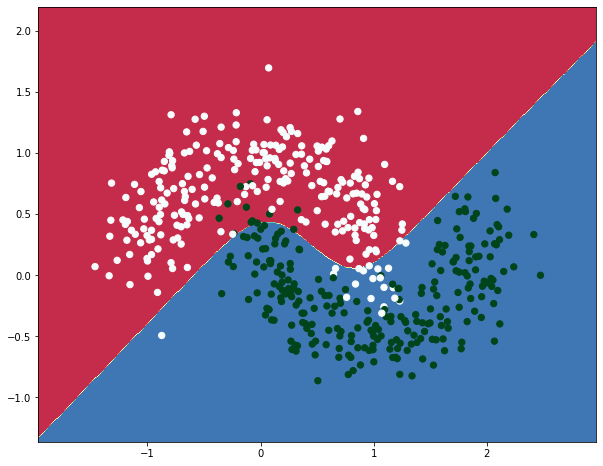

In [ ]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.01
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                    np.arange(y_min, y_max, h))
# Predict the function value for the whole gid
Z= modelann.predict(np.c_[xx.ravel(),yy.ravel()])
Z[Z>=0.5]=1
Z[Z<0.5]=0

Z = Z.reshape(xx.shape)
# Plot the contour and training examples
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
plt.scatter(X[:, 0], X[:, 1], s=40,  c=y, cmap=plt.cm.BuGn)